# Research Question 1: How does smoking affect medical costs

We decided to analyze the differences between smokers and non smokers when it comes to medical costs, as well as if there are any other factors aside from smoking that might change costs. We decided to look into this as smoking is a common cause of cancer and other health problems that might increase risk to health and medical costs

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def data_processing_rename(file):
    df = pd.read_csv(file)
    df2 = df.rename(columns = {'age':'Age', 'sex':'Sex', 'bmi':'BMI', 'children':'Children', 'smoker':'Smoker', 'region':'Region', 'charges':'Medical Costs'})
    return df2

df = data_processing_rename("../Luis/data/Medical_Cost.csv")

### We gathered the data from this dataset

In [40]:
df

,Age,Sex,BMI,Children,Smoker,Region,Medical Costs
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


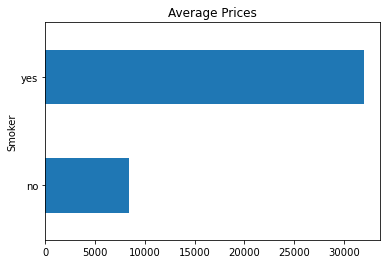

In [41]:
df_prices = df.groupby("Smoker").agg([np.mean])

buddy = df_prices['Medical Costs']
buddy.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices");

Mean cost for smokers: 32050.23
Mean cost for non smokers: 8434.27


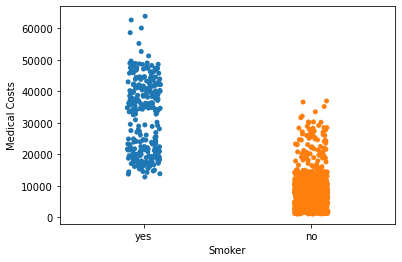

In [42]:
df_smokers = df.loc[df['Smoker'] == 'yes']
df_non_smokers = df.loc[df['Smoker'] == 'no']

print("Mean cost for smokers: %.2f" % (df['Medical Costs'].loc[df['Smoker'] == 'yes'].mean()))
print("Mean cost for non smokers: %.2f" % (df['Medical Costs'].loc[df['Smoker'] == 'no'].mean()))
sns.stripplot(x = 'Smoker', y = 'Medical Costs', data = df);

Mean cost for female smokers: 30679.00
Mean cost for male smokers: 33042.01


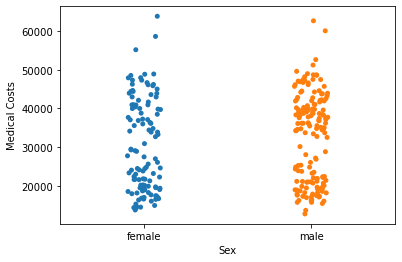

In [43]:
print("Mean cost for female smokers: %.2f" % (df_smokers['Medical Costs'].loc[df_smokers['Sex'] == 'female'].mean()))
print("Mean cost for male smokers: %.2f" % (df_smokers['Medical Costs'].loc[df_smokers['Sex'] == 'male'].mean()))
sns.stripplot(x = 'Sex', y = 'Medical Costs', data = df_smokers);

### As we can gather from these tables, smoking significantly increases the medical costs as it probably does cause many health related issues and risks. We can see that the cost for smokers is four times higher than that for non smokers, and also that smoking related health problems are independent of the sex of the person

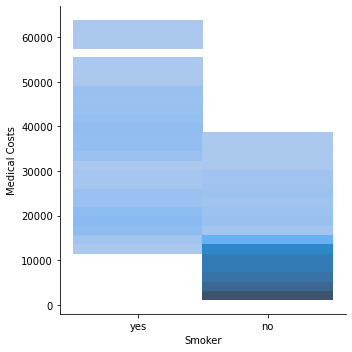

In [44]:
sns.displot(df, x = 'Smoker', y= 'Medical Costs');

#### Not only that. But this heatmap also allows us to see that most of the people that do not smoke are around and under 10,000 in medical costs. Signifying that many non smokers have no other health issues

## Conclusion for research question 1 

The data provided here indicates that smokers have a significantly higher medical cost than non smokers and we can use this to confirm that smoking comes with many health risks and problems. These health risks also seem to be independent of gender or other factors, and the simple fact that you smoke increases the likelihood of reduced health

---

# Research Question 2: How does age affect medical costs

Apart from smoking, we want to investigate how much healthier young people are when compared to older people. We will reach a conclusion be using a variety of graphs to see how much medical costs change as people age.

                    Age  Medical Costs
Age            1.000000       0.840044
Medical Costs  0.840044       1.000000


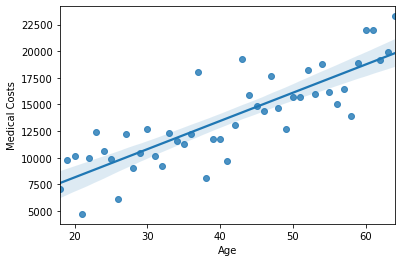

In [45]:
new_df = df.loc[:,['Age','Medical Costs']].reset_index(drop =True)
average_new_df = new_df.groupby(df['Age']).agg(np.mean)
pearson = average_new_df.corr()

print(pearson)
sns.regplot(x="Age", y="Medical Costs", data=average_new_df);

### Here we drew a trend line between the means of medical costs per age. The trendline shows a clearly increasing trend that positively correlates age to medical costs. We also found the pearson coefficient for this trend line which resulted in a 0.84, classifying the trend as a strong correlation

        Sex  Medical Costs
Sex                       
female  662            662
male    676            676


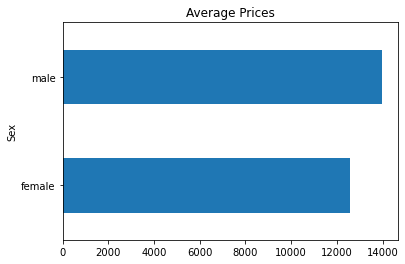

In [46]:
df_sex = df.loc[:,['Sex','Medical Costs']].reset_index(drop = True)
average_df_sex = df_sex.groupby(df['Sex']).agg(np.mean)

print(df_sex.groupby(df['Sex']).count())
average_df_sex.plot(kind = "barh", y = "Medical Costs", legend = False, 
           title = "Average Prices");

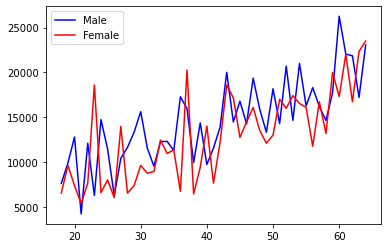

In [47]:
new_df_male = df.loc[df['Sex'] == 'male']
new_male = new_df_male.loc[:,['Age','Medical Costs']]
average_male_df = new_male.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)

new_df_female = df.loc[df['Sex'] == 'female']
new_female = new_df_female.loc[:,['Age','Medical Costs']]
average_female_df = new_female.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(average_male_df, color = 'blue', label = 'Male')
ax.plot(average_female_df, color = 'Red', label = 'Female')
ax.legend();

### These plots here compare the medical costs between male and female participants. We see initially that males have slightly higher medical costs than women on average. When we look at how many people were interviewed, there are over 600 per sex and there is very equal representation between the two. However, as we can see from the second table, the costs seem very similar between the two. This means that we can attribute the difference between medical costs to be due to the small sample size with high variation

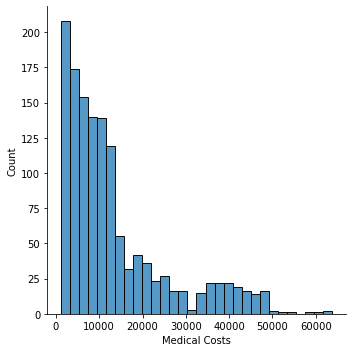

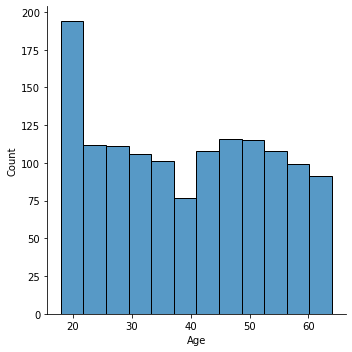

In [48]:
sns.displot(x = 'Medical Costs', data = df);
sns.displot(x = 'Age', data = df);

### These tables are also interesting since it could prove that the only reason why many people seem to have very low medical costs is that an abnormal amount of young people were interviewed when compared to other age groups

## Conclusion for research question 2

The graphs provided clearly show that there is a steady increase between age and medical costs. This is most likely due to the fact that the human body is way stronger when its younger and it is more prone to diseases and phyisical injuries as it grows older. We also concluded that male and female medical costs are equal and there is no clear difference between the two.